In [1]:
#How much do certain pet owners spend?


In [2]:
#importing pandas
import pandas as pd

In [3]:
#Importing the dataset
customer_database = pd.read_csv("D:\OneDrive\Desktop\Work\python\MongoData\customer_database.csv")

In [4]:
customer_database

,Customer_First,Customer_Last,Address,Email,2021_Visits,2021_Total_Spend,Pet_Type
0,Tyrese,Buckridge,2533 Ford Views,wcastro@yahoo.com,27,465.75,bird
1,Malvin,Keeling,5221 Christopher Landing Suite 898,udavis@hotmail.com,95,1638.75,fish
2,Litzy,Paucek,40306 Floyd Hollow,barbara42@gmail.com,6,103.50,cat
3,Victoriano,McClure,5123 Preston Plain,christopher91@yahoo.com,59,1017.75,dog
4,Virgil,Osinski,6981 Christina Summit Apt. 971,susanlopez@gmail.com,55,948.75,cat
...,...,...,...,...,...,...,...
253,Chance,Kreiger,7602 Harmon Ferry,curtislogan@gmail.com,92,1587.00,dog
254,Donita,Torphy,54673 Erin Run,tnorman@hotmail.com,79,1362.75,bird
255,Loyd,Breitenberg,42465 Stephanie Spring,valerie19@hotmail.com,14,241.50,dog
256,Dock,Smitham,96061 Lopez Estate,marywagner@yahoo.com,68,1173.00,cat


In [5]:
#Dummy coding Pet_Type
mammal = pd.get_dummies(customer_database['Pet_Type'], dtype=int)


In [6]:
mammal

,bird,cat,dog,fish,hamster,turtle
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
253,0,0,1,0,0,0
254,1,0,0,0,0,0
255,0,0,1,0,0,0
256,0,1,0,0,0,0


In [7]:
customer_database2 = pd.concat([customer_database,mammal], axis=1)
customer_database2

,Customer_First,Customer_Last,Address,Email,2021_Visits,2021_Total_Spend,Pet_Type,bird,cat,dog,fish,hamster,turtle
0,Tyrese,Buckridge,2533 Ford Views,wcastro@yahoo.com,27,465.75,bird,1,0,0,0,0,0
1,Malvin,Keeling,5221 Christopher Landing Suite 898,udavis@hotmail.com,95,1638.75,fish,0,0,0,1,0,0
2,Litzy,Paucek,40306 Floyd Hollow,barbara42@gmail.com,6,103.50,cat,0,1,0,0,0,0
3,Victoriano,McClure,5123 Preston Plain,christopher91@yahoo.com,59,1017.75,dog,0,0,1,0,0,0
4,Virgil,Osinski,6981 Christina Summit Apt. 971,susanlopez@gmail.com,55,948.75,cat,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Chance,Kreiger,7602 Harmon Ferry,curtislogan@gmail.com,92,1587.00,dog,0,0,1,0,0,0
254,Donita,Torphy,54673 Erin Run,tnorman@hotmail.com,79,1362.75,bird,1,0,0,0,0,0
255,Loyd,Breitenberg,42465 Stephanie Spring,valerie19@hotmail.com,14,241.50,dog,0,0,1,0,0,0
256,Dock,Smitham,96061 Lopez Estate,marywagner@yahoo.com,68,1173.00,cat,0,1,0,0,0,0


In [8]:
customer_database2 = customer_database2.drop(columns=['Customer_Last', 'Customer_First', 'Address', 'Email', 'Pet_Type'])


In [9]:
customer_database2

,2021_Visits,2021_Total_Spend,bird,cat,dog,fish,hamster,turtle
0,27,465.75,1,0,0,0,0,0
1,95,1638.75,0,0,0,1,0,0
2,6,103.50,0,1,0,0,0,0
3,59,1017.75,0,0,1,0,0,0
4,55,948.75,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
253,92,1587.00,0,0,1,0,0,0
254,79,1362.75,1,0,0,0,0,0
255,14,241.50,0,0,1,0,0,0
256,68,1173.00,0,1,0,0,0,0


In [10]:
customer_database2.shape

(258, 8)

In [11]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [12]:
# Split our preprocessed data into our features and target arrays
target = customer_database2["2021_Total_Spend"]
data = customer_database2[['2021_Visits', 'bird', 'dog', 'cat', 'fish', 'hamster', 'turtle']]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=78)

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create a decision tree regression model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
dt_regressor.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
y_pred = dt_regressor.predict(X_test)

In [14]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


Mean Squared Error: 82.40192307692308
Root Mean Squared Error: 9.077550499827753
Mean Absolute Error: 3.7153846153846155
R-squared: 0.9996350767929426


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a decision tree regression model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='r2', return_train_score=True, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean cross-validated score:', grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best mean cross-validated score: 0.9848477250723053


In [16]:
# Create a decision tree regression model with the best hyperparameters
dt_regressor_best = DecisionTreeRegressor(max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=42)

# Train the model on the training data
dt_regressor_best.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = dt_regressor_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 4148.612560096154
Root Mean Squared Error: 64.40972411131843
Mean Absolute Error: 39.21057692307692
R-squared: 0.9816275525650566


In [17]:
customer_database

,Customer_First,Customer_Last,Address,Email,2021_Visits,2021_Total_Spend,Pet_Type
0,Tyrese,Buckridge,2533 Ford Views,wcastro@yahoo.com,27,465.75,bird
1,Malvin,Keeling,5221 Christopher Landing Suite 898,udavis@hotmail.com,95,1638.75,fish
2,Litzy,Paucek,40306 Floyd Hollow,barbara42@gmail.com,6,103.50,cat
3,Victoriano,McClure,5123 Preston Plain,christopher91@yahoo.com,59,1017.75,dog
4,Virgil,Osinski,6981 Christina Summit Apt. 971,susanlopez@gmail.com,55,948.75,cat
...,...,...,...,...,...,...,...
253,Chance,Kreiger,7602 Harmon Ferry,curtislogan@gmail.com,92,1587.00,dog
254,Donita,Torphy,54673 Erin Run,tnorman@hotmail.com,79,1362.75,bird
255,Loyd,Breitenberg,42465 Stephanie Spring,valerie19@hotmail.com,14,241.50,dog
256,Dock,Smitham,96061 Lopez Estate,marywagner@yahoo.com,68,1173.00,cat


In [18]:
# Selecting which Pet
filtered_data = customer_database[customer_database["Pet_Type"] == "dog"]
filtered_data

,Customer_First,Customer_Last,Address,Email,2021_Visits,2021_Total_Spend,Pet_Type
3,Victoriano,McClure,5123 Preston Plain,christopher91@yahoo.com,59,1017.75,dog
6,Maggie,Leffler,5089 Doyle Track Apt. 428,eric07@hotmail.com,82,1414.50,dog
10,Jeanetta,Bednar,8770 Heather Shores Apt. 087,alan24@yahoo.com,22,379.50,dog
14,Mckenzie,Gusikowski,23287 Smith Avenue,nancymorrison@gmail.com,98,1690.50,dog
17,Braulio,Daniel,68369 Harris Motorway Apt. 444,georgedavid@yahoo.com,10,172.50,dog
...,...,...,...,...,...,...,...
245,Harl,Hodkiewicz,096 Brown Motorway Suite 192,timosborne@hotmail.com,79,1362.75,dog
249,Corene,Effertz,45557 Ashley Heights,znelson@yahoo.com,24,414.00,dog
252,Giselle,Lesch,2253 Watson Mall,josephsmith@yahoo.com,21,362.25,dog
253,Chance,Kreiger,7602 Harmon Ferry,curtislogan@gmail.com,92,1587.00,dog


In [19]:
#Drop unnecessary columns
filtered_data = filtered_data.drop('Customer_Last', axis=1)
filtered_data = filtered_data.drop('Customer_First', axis=1)
filtered_data = filtered_data.drop('Address', axis=1)
filtered_data = filtered_data.drop('Email', axis=1)
filtered_data = filtered_data.drop('Pet_Type', axis=1)

In [20]:
filtered_data

,2021_Visits,2021_Total_Spend
3,59,1017.75
6,82,1414.50
10,22,379.50
14,98,1690.50
17,10,172.50
...,...,...
245,79,1362.75
249,24,414.00
252,21,362.25
253,92,1587.00


In [21]:
# Spending
X = filtered_data.drop('2021_Total_Spend', axis=1)
y = filtered_data['2021_Total_Spend']

# X = X.fillna(0)
# y = y.fillna(0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:

from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)


# %%
y_pred = dt_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 595.125
Root Mean Squared Error: 24.39518395093589
Mean Absolute Error: 18.4
R-squared: 0.9969714508769332


In [23]:

# Predict the target values for the test set (X_test)
y_pred = dt_regressor.predict(X_test)

# Print the predicted values
print("Predicted values:\n", y_pred)


# %%
import pandas as pd

# Create a new DataFrame with the actual and predicted values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Print the first 10 rows of the predictions DataFrame
print("First 10 rows of predictions:\n", predictions_df.head(10))


# %%
predictions_df

# %%
#for loop, for each state, all diseases




Predicted values:
 [1293.75 1052.25 1345.5   172.5   879.75 1104.    276.    345.   1362.75
 1121.25 1293.75 1052.25 1690.5  1500.75 1414.5 ]
First 10 rows of predictions:
       Actual  Predicted
95   1242.00    1293.75
3    1017.75    1052.25
188  1345.50    1345.50
17    172.50     172.50
201   862.50     879.75
64   1104.00    1104.00
48    310.50     276.00
137   345.00     345.00
184  1380.00    1362.75
50   1121.25    1121.25


,Actual,Predicted
95,1242.00,1293.75
3,1017.75,1052.25
188,1345.50,1345.50
17,172.50,172.50
201,862.50,879.75
64,1104.00,1104.00
48,310.50,276.00
137,345.00,345.00
184,1380.00,1362.75
50,1121.25,1121.25


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize an empty list to store the predictions DataFrames
predictions_dfs = []

# Get the unique mammals
pets = customer_database['Pet_Type'].unique()

# Get the columns of interest
columns_of_interest = ['2021_Visits','2021_Total_Spend' ]

# Loop through the mammals
for mammals in pets:
    # Filter the data
    filtered_data = customer_database[customer_database['Pet_Type'] == mammals]

    # Loop through the columns of interest
    for column in columns_of_interest:
        # Preprocessing steps
        
        
        filtered_data = filtered_data.drop('Customer_Last', axis=1)
        filtered_data = filtered_data.drop('Customer_First', axis=1)
        filtered_data = filtered_data.drop('Address', axis=1)
        filtered_data = filtered_data.drop('Email', axis=1)
        filtered_data = filtered_data.drop('Pet_Type', axis=1)
       

        # Split the data into features (X) and target (y)
        X = filtered_data.drop(column, axis=1)
        y = filtered_data[column]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
        dt_regressor = DecisionTreeRegressor(random_state=42)
        dt_regressor.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = dt_regressor.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Create a DataFrame with the actual and predicted values
        predictions_df = pd.DataFrame({
            'Actual': y_test,
            'Predicted': y_pred,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        })

        # Add the pet_type and column name to the DataFrame
        predictions_df['Pet_Type'] = mammals
        predictions_df['Column'] = column

        # Append the DataFrame to the list
        predictions_dfs.append(predictions_df)
        filtered_data = customer_database[customer_database['Pet_Type'] == mammals].reset_index(drop=True)


# Concatenate the predictions DataFrames into a single DataFrame
combined_predictions_df = pd.concat(predictions_dfs, ignore_index=True)

# Save the DataFrame to a CSV file
combined_predictions_df.to_csv("combined_predictions.csv", index=False)


In [25]:
combined_predictions_df

,Actual,Predicted,MSE,RMSE,MAE,R2,Pet_Type,Column
0,10.00,7.00,2.600000,1.612452,1.0000,0.997311,bird,2021_Visits
1,79.00,79.00,2.600000,1.612452,1.0000,0.997311,bird,2021_Visits
2,27.00,27.00,2.600000,1.612452,1.0000,0.997311,bird,2021_Visits
3,33.00,33.00,2.600000,1.612452,1.0000,0.997311,bird,2021_Visits
4,90.00,92.00,2.600000,1.612452,1.0000,0.997311,bird,2021_Visits
...,...,...,...,...,...,...,...,...
103,1207.50,1224.75,6174.421875,78.577490,64.6875,0.945205,turtle,2021_Total_Spend
104,12.00,30.00,234.000000,15.297059,15.0000,0.235918,hamster,2021_Visits
105,47.00,59.00,234.000000,15.297059,15.0000,0.235918,hamster,2021_Visits
106,207.00,517.50,69629.625000,263.874260,258.7500,0.235918,hamster,2021_Total_Spend


In [26]:
# Group by "Jurisdiction" and "Column" and sum the "Predicted" values
df = combined_predictions_df.groupby(['Pet_Type', 'Column'], as_index=False)['Predicted'].sum()

# Pivot the DataFrame
df_pivot = df.pivot(index='Pet_Type', columns='Column', values='Predicted')

# Reset the index to make it a regular column
df_pivot = df_pivot.reset_index()

In [36]:
df_pivot = df_pivot.rename(columns={"2021_Total_Spend": "2020+_Total_Spend_Prediction", "2021_Visits":"2020+_Total_Visit_Prediction"})
df_pivot

Column,Pet_Type,2020+_Total_Spend_Prediction,2020+_Total_Visit_Prediction,Average_Spend_Per_Visit
0,bird,4105.50,238.0,17.25
1,cat,23615.25,1369.0,17.25
2,dog,15904.50,922.0,17.25
3,fish,3622.50,210.0,17.25
4,hamster,1535.25,89.0,17.25
5,turtle,4312.50,250.0,17.25


In [39]:
# Save the DataFrame to a CSV file
df_pivot.to_csv("df_pivot.csv", index=False)

In [37]:

# df_pivot['Average_Spend_Per_Visit'] = df_pivot['2021_Total_Spend'] / df_pivot['2021_Visits']

# print(df)

In [38]:
# average_spend_per_visit_by_pet = df_pivot.groupby('Pet_Type')['Average_Spend_Per_Visit'].mean()

# print(average_spend_per_visit_by_pet)

In [31]:
pivoted_df = df.pivot(index='Pet_Type', columns='Column', values='Predicted')

# Rename columns
pivoted_df.columns = ['Total Spend', 'Visits']

# Reset index
pivoted_df = pivoted_df.reset_index()

print(pivoted_df)

  Pet_Type  Total Spend  Visits
0     bird      4105.50   238.0
1      cat     23615.25  1369.0
2      dog     15904.50   922.0
3     fish      3622.50   210.0
4  hamster      1535.25    89.0
5   turtle      4312.50   250.0


In [32]:
sorted_df = pivoted_df.sort_values('Total Spend', ascending=False)

print(sorted_df)

  Pet_Type  Total Spend  Visits
1      cat     23615.25  1369.0
2      dog     15904.50   922.0
5   turtle      4312.50   250.0
0     bird      4105.50   238.0
3     fish      3622.50   210.0
4  hamster      1535.25    89.0


In [33]:
import matplotlib.pyplot as plt

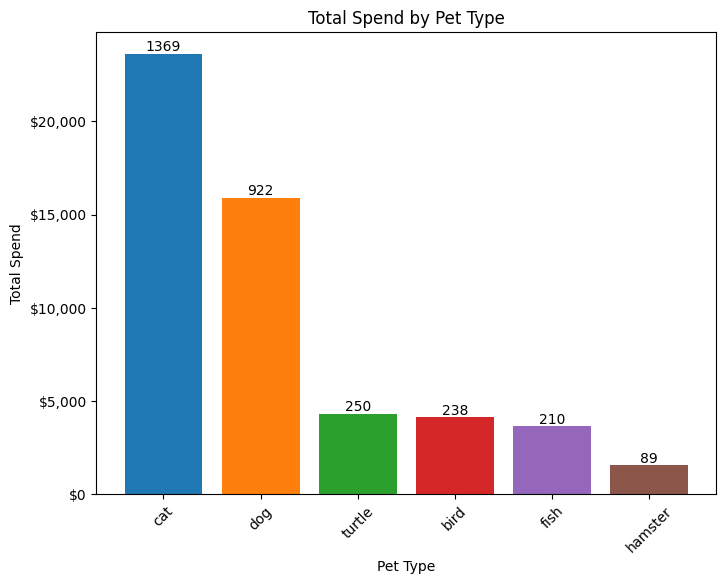

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    "Pet_Type": ["cat", "dog", "turtle", "bird", "fish", "hamster"],
    "Total Spend": [23615.25, 15904.50, 4312.50, 4105.50, 3622.50, 1535.25],
    "Visits": [1369.0, 922.0, 250.0, 238.0, 210.0, 89.0]
}

df = pd.DataFrame(data)

# Sort the DataFrame based on 'Total Spend'
df_sorted = df.sort_values(by="Total Spend", ascending=False)

# Create a regular bar chart using matplotlib
plt.figure(figsize=(8, 6))
bars = plt.bar(df_sorted["Pet_Type"], df_sorted["Total Spend"], color=["C0", "C1", "C2", "C3", "C4", "C5"])
plt.xlabel("Pet Type")
plt.ylabel("Total Spend")
plt.title("Total Spend/Visits Prediction 2020+ by Pet Type")
plt.xticks(rotation=45)

# Format the y-axis labels as currency
from matplotlib.ticker import StrMethodFormatter
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

# Add the 'Visits' values as labels on top of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{df_sorted['Visits'][i]:.0f}", ha='center', va='bottom')

# Display the chart
plt.show()
